# Tarea 3
## Análisis de Datos
## Ana Isabel Moreno Hernández 
## NUA: 434232

# **Visualization with Matplotlib**

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os
%matplotlib inline
plt.style.use('seaborn-whitegrid')

Antes que nada, descargamos algunos conjuntos de datos para emplearlos en esta tarea-

In [2]:
# Tasas de años
url = 'https://www.indexmundi.com/map/?t=0&v=25&r=xx&1=en'
html = requests.get(url).content
Birth_rate = pd.read_html(html)[2]
Birth_rate.head()

,Country,"Birth rate (births/1,000 population)",Year
0,Angola,44,2017
1,Niger,44,2017
2,Mali,44,2017
3,Uganda,43,2017
4,Zambia,42,2017


In [3]:
# Tasa de desempleo 
url = 'https://www.indexmundi.com/map/?t=0&v=74&r=xx&l=en'
html = requests.get(url).content
unemployement = pd.read_html(html)[2]
unemployement.head()

,Country,Unemployment rate (%),Year
0,Zimbabwe,95,2009
1,Burkina Faso,77,2004
2,Djibouti,60,2014
3,Syria,50,2017
4,Senegal,48,2007


In [4]:
# Número de manchas solares por año
anios = []
manchas = []
for i in range(5):
    sunspots = np.loadtxt('sunspots.txt', dtype=[('anio',int),('Numero',float)], usecols = (i*2,i*2+1), unpack = True)
    anios = np.concatenate((anios,sunspots[0]),axis=0)
    manchas = np.concatenate((manchas,sunspots[1]),axis=0)

In [5]:
# Datos de temperatura y precipitación
temp_minima_2019 = pd.read_csv('temp_minima_2019.csv', encoding='latin-1')
temp_media_2019 = pd.read_csv('temp_media_2019.csv', encoding='latin-1')
temp_maxima_2019 = pd.read_csv('temp_maxima_2019.csv', encoding='latin-1')
lluvias_2019 = pd.read_csv('lluvias_2019.csv', encoding='latin-1')

temp_minima_2018 = pd.read_csv('temp_minima_2018.csv',encoding='latin-1')
temp_media_2018 = pd.read_csv('temp_media_2018.csv',encoding='latin-1')
temp_maxima_2018 = pd.read_csv('temp_maxima_2018.csv',encoding='latin-1')
lluvias_2018 = pd.read_csv('lluvias_2018.csv',encoding='latin-1')

In [6]:
temp_minima_2018.head()

,Lon,Lat,Clave,Edo,Est,Tmin
0,-101.51,20.43,ABSGJ,GTO,ABASOLO,7.5
1,-98.38,24.06,ABSTP,TAMPS,ABASOLO,7.9
2,-116.90,32.44,ALRBN,BC,ABELARDO L. RODRIGUEZ,10.2
3,-97.97,20.17,ACJPB,PUE,ACAJETE *,2.4
4,-92.80,16.55,ACACP,CHIS,ACALA,13.9


## **Simple line plots**

Empezamos creando una figura y ejes:

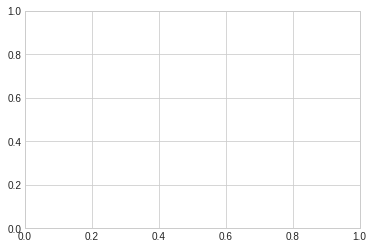

In [7]:
fig = plt.figure()
ax = plt.axes()

Donde figure pertenece a la clase Figure y axes a la clase Axes. Figure crea la gráfica, el texto y los ejes, mientras que Axes crea el canvas.

Plot sirve para graficar y mostrar un conjunto de datos.

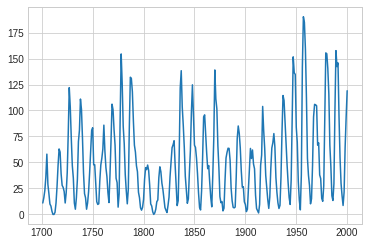

In [8]:
# Graficamos las manchas solares contra el año
fig = plt.figure()
ax = plt.axes()
ax.plot(anios, manchas);

Plt.plot hace lo mismo.

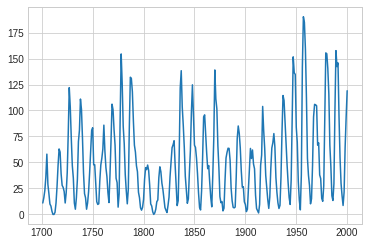

In [9]:
plt.plot(anios,manchas);

Para crear una figura con múltiples conjuntos de datos.

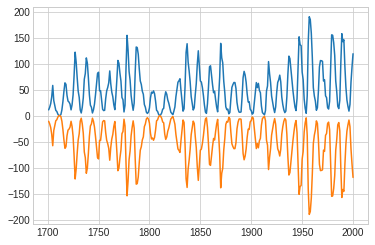

In [10]:
plt.plot(anios, manchas)
plt.plot(anios, manchas-2*manchas)

Para modificar colores y estilos.

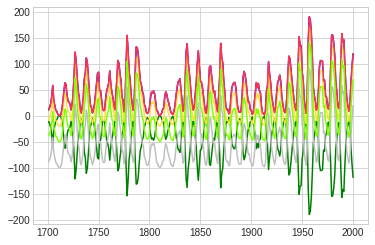

In [11]:
plt.plot(anios, manchas, color='blue')        # Con el nombre específico del color
plt.plot(anios, -1*manchas, color='g')           # Con el modo corto del color
plt.plot(anios, manchas-100, color='0.75')        # Escala de grises entre 0 a 1
plt.plot(anios, manchas-20, color='#FFDD44')     # Código hexadecimal
plt.plot(anios, manchas, color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(anios, manchas-50, color='chartreuse'); # all HTML color names supported

Y para ajustar el estilo de la línea. 

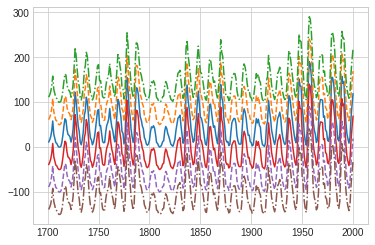

In [12]:
plt.plot(anios, manchas, linestyle='solid')        # Línea continua
plt.plot(anios, manchas+50, linestyle='dashed')    # Línea con rayas -       
plt.plot(anios, manchas+100, linestyle='dashdot'); # Línea con rayas y puntos

plt.plot(anios, manchas-50, linestyle='-')    
plt.plot(anios, manchas-100, linestyle='--') 
plt.plot(anios, manchas-150, linestyle='-.');

Y finalmente, para modificar estilos de líneas y colores:

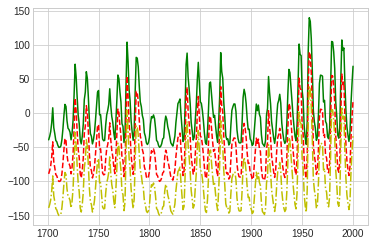

In [13]:
plt.plot(anios, manchas-50, 'g-')    
plt.plot(anios, manchas-100, 'r--') 
plt.plot(anios, manchas-150, 'y-.');

Luego, para modificar los límites de los ejes utilizamos plt.xlim y plt.ylim.

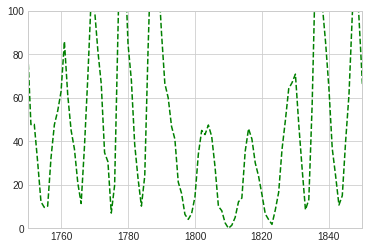

In [14]:
plt.plot(anios, manchas, 'g--')

plt.xlim(1750, 1850)
plt.ylim(0, 100);

Y lo mismo puede hacerse con plt.axis.

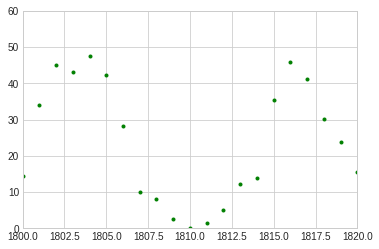

In [15]:
plt.plot(anios, manchas, 'g.')
plt.axis([1800, 1820, 0, 60]);

Con axis('tight') podemos ajustar el canvas a la gráfica.

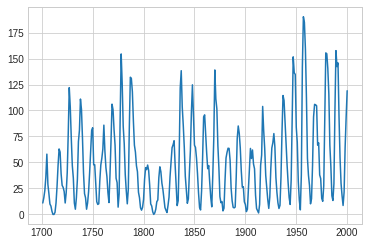

In [16]:
plt.plot(anios, manchas)
plt.axis('tight');

Incluso axis permite observar en la gráfica sólo una fracción igualitaria de x y de y

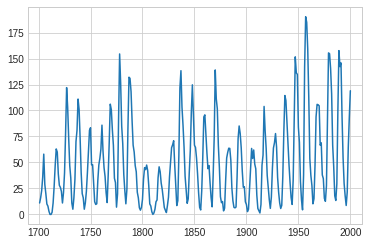

In [17]:
plt.plot(anios, manchas)
plt.axis('equal');

Finalmente, para poner títulos en las gráficas, en los ejes y leyendas, existen diversas formas de hacerlo.

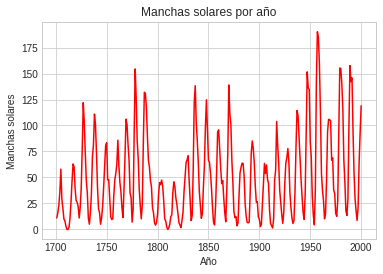

In [18]:
plt.plot(anios, manchas, 'red')
plt.title("Manchas solares por año")
plt.xlabel("Año")
plt.ylabel("Manchas solares");

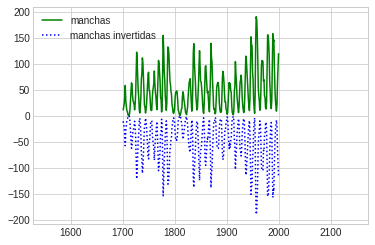

In [19]:
plt.plot(anios, manchas, '-g', label='manchas')
plt.plot(anios, -manchas, ':b', label='manchas invertidas')
plt.axis('equal')

plt.legend();

Y con la clase Axes obtenemos cosas similares.

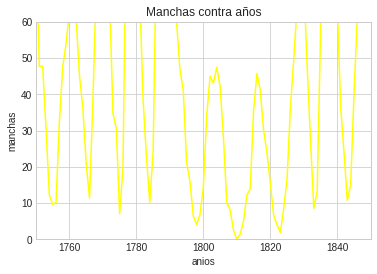

In [20]:
ax = plt.axes()
ax.plot(anios, manchas, 'yellow')
ax.set(xlim=(1750, 1850), ylim=(0, 60),
       xlabel='anios', ylabel='manchas',
       title='Manchas contra años');

## **Simple Scatter Plots**

Si bien en la sección anterior aprendimos a crear gráficos con plt.plot. Un ejemplo de esto es lo siguiente:

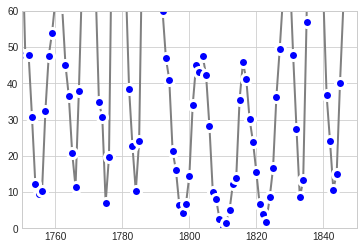

In [21]:
plt.plot(anios, manchas, '-o', color='gray',
         markersize=10, linewidth=2,
         markerfacecolor='blue',
         markeredgecolor='white',
         markeredgewidth=3)
plt.xlim(1750,1850)
plt.ylim(0, 60);

Con plt.scatter podemos crear gráficos también. Las ventajas de scatter es que podemos modificar las propiedades de cada dato. En el siguiente ejemplo vuelve a graficarse manchas solares contra años, pero modificando aleatoriamente tamaño, color y estilo de los puntos.

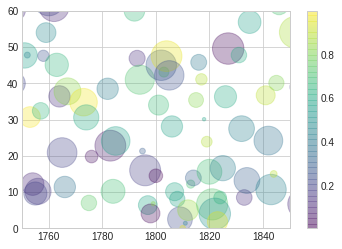

In [22]:
rng = np.random.RandomState(0)
colors = rng.rand(len(anios))
sizes = 1000 * rng.rand(len(anios))
plt.scatter(anios, manchas, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.xlim(1750,1850)
plt.ylim(0, 60);
plt.colorbar(); #Para mostrar la escala de colores

## **Visualizing Errors**

En matplotlib pueden generarse gráficas con barras de error. En el siguiente ejemplo se muestra el código para graficar manchas solares contra años, con una incertidumbre igual a 30 en todas.

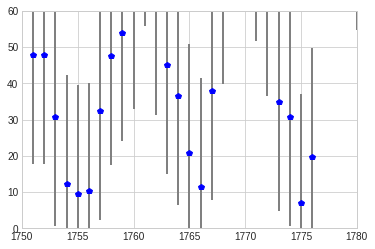

In [23]:
dy = 30
plt.errorbar(anios, manchas, yerr=dy, fmt='p', color='blue',
             ecolor='gray', elinewidth=2, capsize=0); # Decido que sean pentágonos azules con barras de color gris
plt.ylim(0,60)
plt.xlim(1750,1780);

Y para poner errores en la variable x basta con utilizar xerr, donde incluso xerr puede ser un array.

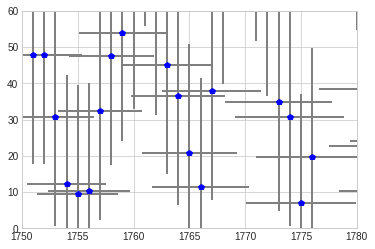

In [24]:
dy = 30
dx = np.linspace(0,20,len(anios))
plt.errorbar(anios, manchas, xerr = dx,yerr=dy, fmt='p', color='blue',
             ecolor='gray', elinewidth=2, capsize=0); # Decido que sean pentágonos azules con barras de color gris
plt.ylim(0,60)
plt.xlim(1750,1780);

## **Density and Contour Plots**

In [25]:
plt.style.use('seaborn-white')

En matplotlib pueden crearse gráficas de 3 dimensiones y una de las más importantes vistas es el contour, ya que es donde podemos observar la distribución de los datos en dos dimensiones. 

plt.contour toma una cuadrícula de x, una de y y una z. x y y representan posiciones y los valores de z son representados por los niveles de contour.

meshgrid genera cuadrículas de dos dimensiones de un arreglo de una dimensión.

En el siguiente código, se hará una gráfica de 3 dimensiones donde 'x' será la longitud, 'y' la latitud y 'z' será la temperatura en 'x'. Claro está que esto será tomando los datos de temperaturas anteriormente guardados. Cabe mencionar que sólo se observará la temperatura en la longitud tal, no sé observará con qué latitud es.

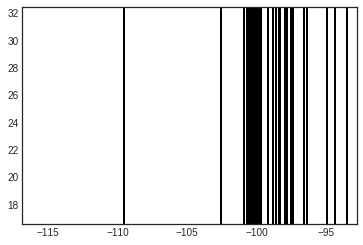

In [26]:
x = temp_media_2018['Lon'][0:20]
y = temp_media_2018['Lat'][0:20]

X, Y = np.meshgrid(x, y)
Z, W = np.meshgrid(temp_media_2018['Tmed'][0:20],x) #Para generar un grid en Z, W es para guardar el otro arreglo

plt.contour(X, Y, Z, colors='black');

Y por colores, pueden observarse las zonas donde la temperatura es mayor.

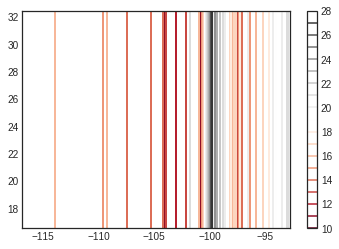

In [27]:
plt.contour(X, Y, Z, 20, cmap='RdGy'); #cmap sirve para poner colores, 20 es el número de líneas de color
# RdGy es por Red-Gray colormap. Así es la escala de colores, del rojo al gris.
plt.colorbar();

Si los espacios de las líneas no nos permiten ver con más claridad, utilizamos plt.contourf, que es lo mismo que plt.contour()

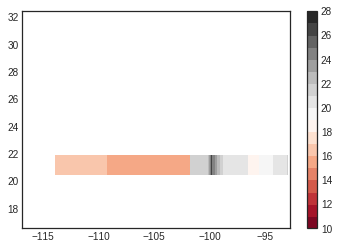

In [28]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

Luego, para ver los colores de una forma más continua utilizamos imshow. Es importante mencionar que imshow no acepta cuadriculados de arrays, sólo toma rangos de valores de x y de y, y ajustará estos rangos al cuadriculado Z.

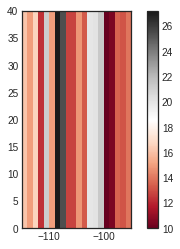

In [29]:
plt.imshow(Z, extent=[-115, -95, 0, 40], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

Finalmente, para combinar plt.imshow y contours. En el siguiente ejemplo se muestran los dos en una sola gráfica, además de que se muestran los valores de las temperaturas en cada valor de x.

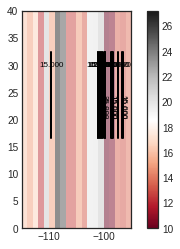

In [30]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[-115, -95, 0, 40], origin='lower',
           cmap='RdGy', alpha=1.5) # Alpha indica la transparencia
plt.colorbar();

## **Histograms, Binnings, and Density**

Además de gráficas, podemos generar histogramas. La forma más simple de crear un histograma es utilizando plt.hist(array), donde array es un conjunto de datos. plt.hist divide los valores del arreglo en varios bines y si un valor está en un bin determinado, la frecuencia del bin aumenta. 

In [31]:
plt.style.use('seaborn-white')

In [32]:
data = temp_media_2018['Tmed']
data.head()

0    16.2
1    15.0
2    16.7
3    12.3
4    21.2
Name: Tmed, dtype: float64

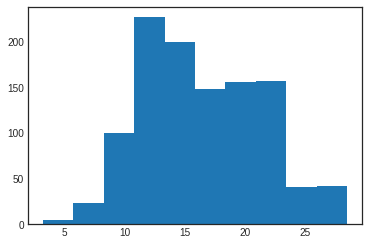

In [33]:
plt.hist(data);

Hay diversas opciones en plt.hist(). Puede normalizarse, el color del histograma transparentar y dividir en un número específico de bines.

/home/anita/Documents/Analisis_Datos/miniconda3/envs/data_main/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


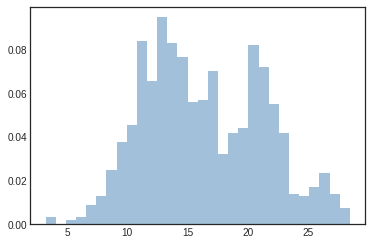

In [34]:
plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

En el siguiente ejemplo haremos en un mismo canvas tres histogramas: uno de las temperaturas mínimas en el 2018, otro de las temperaturas medias del 2018 y el último de las temperaturas máximas del 2018. Cada histograma se muestra con un número de 40 bines, con transparencia 0.3 y normalizado.

/home/anita/Documents/Analisis_Datos/miniconda3/envs/data_main/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/home/anita/Documents/Analisis_Datos/miniconda3/envs/data_main/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/anita/Documents/Analisis_Datos/miniconda3/envs/data_main/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


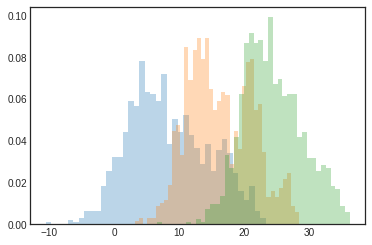

In [35]:
x1 = temp_minima_2018['Tmin']
x2 = temp_media_2018['Tmed']
x3 = temp_maxima_2018['Tmax']

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Y para saber el número de cuentas en cada bin de cada histograma graficado anteriormente, hacemos lo siguiente:

In [36]:
counts1, bin_edges = np.histogram(x1, bins=40)
print(counts1)
counts2, bin_edges = np.histogram(x2, bins=40)
print(counts2)
counts3, bin_edges = np.histogram(x3, bins=40)
print(counts3)

[ 1  0  0  0  2  1  3  6  6  6 17 24 30 30 41 55 53 73 59 58 55 67 36 47
 41 49 40 34 27 36 24 33 38 32 23 15 11 17  6  3]
[ 1  2  0  2  2  6  7  8 13 31 33 23 59 48 58 62 55 62 45 38 41 44 43 20
 31 25 46 54 55 38 40 24  9 11  9 12 15 17  6  4]
[ 1  0  0  0  0  0  1  0  2  1  6  8  8 11 27 22 34 51 71 75 71 72 64 81
 55 57 50 51 51 34 36 26 26 21 23 22 15 14  7  5]


Otro dato interesante es que pueden crearse histogramas de dos dimensiones. Podemos dividir una cuadrícula en varios bines y observar la frecuencia en cada posición. Para los siguientes ejemplos utilizaremos las temperaturas media, la latidud y la longitud de las ciudades en el 2018.

En este primer ejemplo se utilizan los datos de longitud y latitud, los cuales son divididos en 30 bines y se cuenta el número de ciudades que hay en un intervalo de longitud y latitud. Puede observarse una gráfica parecida al mapa de México. 

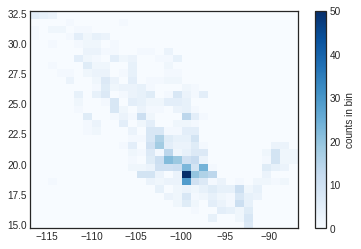

In [37]:
x = temp_media_2018['Lon']
y = temp_media_2018['Lat']

plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Y la forma de contar los bines en este tipo de histogramas es:

In [38]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
counts[0:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 5.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4.]])

En el anterior ejemplo se hicieron divisiones cuadriculadas de longitud y latitud, pero en el siguiente se muestra el uso de plt.hexbin, que en lugar de dividir en cuadrados, divide en hexágonos. Se muestra una gráfica parecida, pero ahora con héxagonos. Y puede notarse que se sigue observando el mapa de México debido a las frecuencias en latitud y longitud.

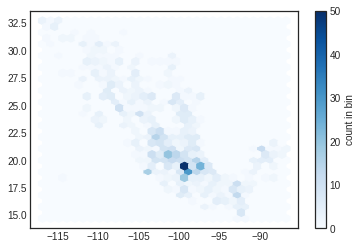

In [39]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

## **Customizing Plot Legends**

In [40]:
plt.style.use('classic')

En esta sección aprendemos a añadir leyendas a las gráficas. Una de las formas más simples para hacerlo es con el siguiente ejemplo.

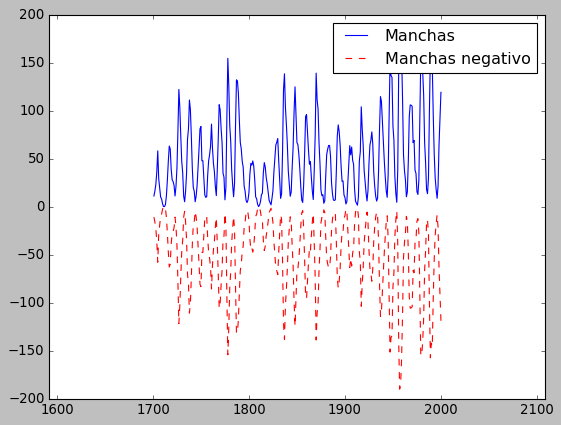

In [41]:
fig, ax = plt.subplots()
ax.plot(anios, manchas, '-b', label='Manchas')
ax.plot(anios, -manchas, '--r', label='Manchas negativo')
ax.axis('equal')
leg = ax.legend();

Y podemos mover el cuadro de las leyendas de la siguiente forma, así como quitar el cuadrado que encierra la leyenda.

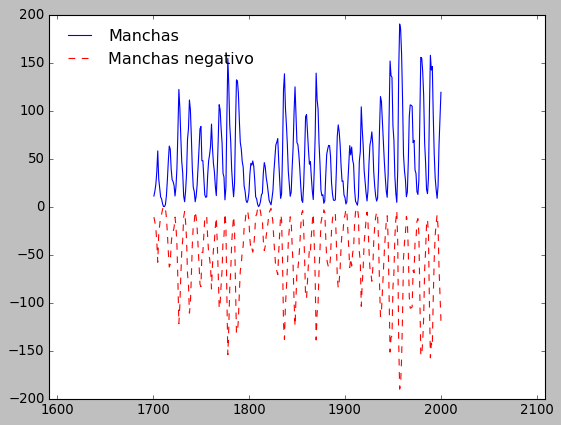

In [42]:
ax.legend(loc='upper left', frameon=False)
fig

Y podemos usar ncol para especificar el número de columnas en la leyenda.

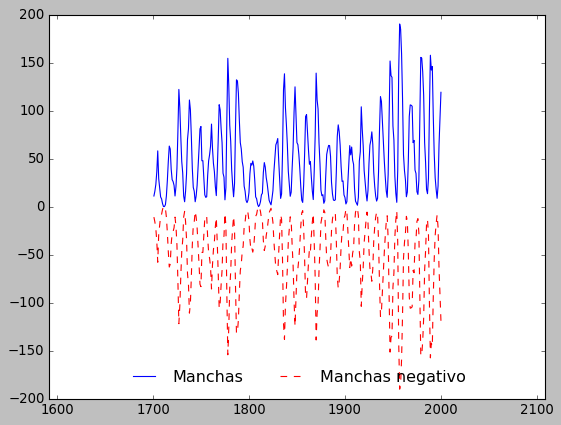

In [43]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

Y para que la caja contenedora de la leyenda tenga sombra y transparencia:

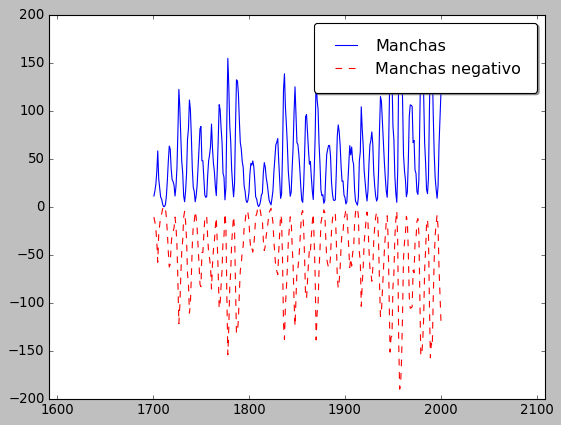

In [44]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

Para elegir qué elementos aparecen en las leyendas y a qué están relacionados hacemos lo siguiente:

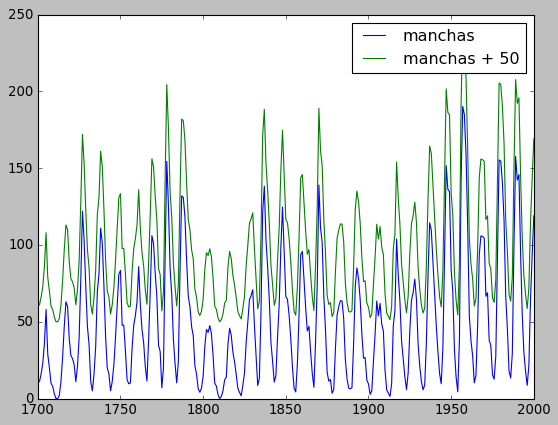

In [45]:
x = anios
y = manchas
lines1 = plt.plot(x, y)
lines2 = plt.plot(x, y+50)

plt.legend(['manchas', 'manchas + 50']);

O de una forma más directa, elegir a qué datos sí mostrar su leyenda:

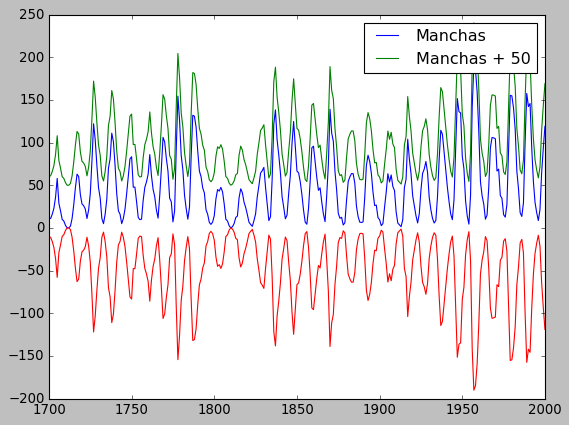

In [46]:
plt.plot(x, y, label='Manchas')
plt.plot(x, y+50, label='Manchas + 50')
plt.plot(x, -y)
plt.legend(framealpha=1, frameon=True);

El siguiente ejemplo es un código modificado de la sección de Customizing Plot Legend del tutorial de Python. En ese código se intenta mostrar el área de las ciudades de California en los tamaños de los puntos, además de que los puntos están posicionados de acuerdo a longitud y latitud. 

El código se modificó para posicionar ciudades de México con los datos de temperaturas medias en el 2018. El tamaño de los puntos indica si la temperatura está entre 0, 10, 20 y 30 grados, así como su color indica la temperatura exacta de la ciudad dada por la barra de colores que se muestra a la derecha. 

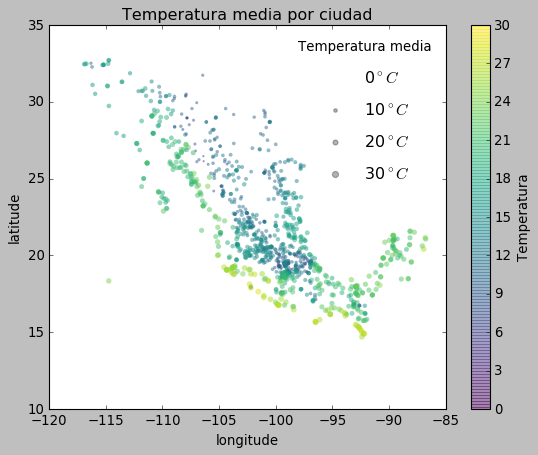

In [47]:
lat, lon = temp_media_2018['Lat'], temp_media_2018['Lon']
temperatura, temperatura_size = temp_media_2018['Tmed'], temp_media_2018['Tmed']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=temperatura, cmap='viridis',
            s=temperatura_size, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='Temperatura')
plt.clim(0, 30)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for temperatura_size in [0,10,20,30]:
    plt.scatter([], [], c='k', alpha=0.3, s=temperatura_size,
                label=str(temperatura_size) + '$^\circ C$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Temperatura media')

plt.title('Temperatura media por ciudad');

Finalmente, para hacer leyendas múltiples en una sola gráfica, hacemos lo siguiente.

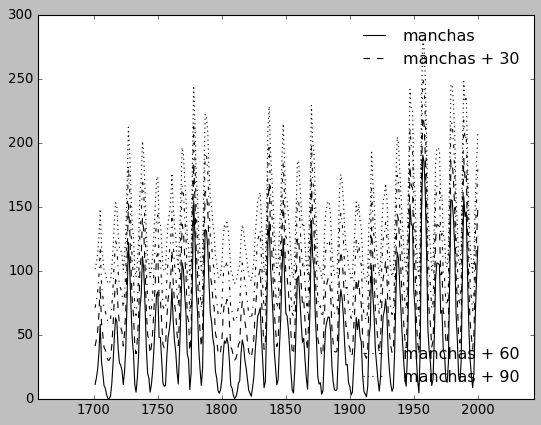

In [48]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']

for i in range(4):
    lines += ax.plot(anios, manchas + i*30,
                     styles[i], color='black')
ax.axis('equal')

# Especificamos las 2 labels de la primer leyenda
ax.legend(lines[:2], ['manchas', 'manchas + 30'],
          loc='upper right', frameon=False)

# Especificamos las 2 labels de la segunda leyenda y unimos las leyendas con add_artis
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['manchas + 60', 'manchas + 90'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

## **Customizing Colorbars**

In [49]:
plt.style.use('classic')

Para los ejemplos de Customizing Colorbars utilizaremos el ejemplo de plt.contour realizado anteriormente.

En este caso utilizamos RdGy, que es un colorbar en rojos y grises.

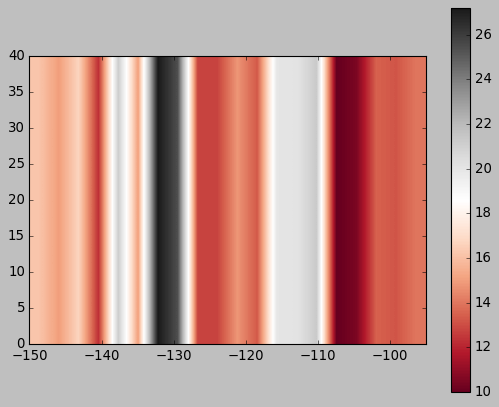

In [50]:
x = temp_media_2018['Lon'][0:20]
y = temp_media_2018['Lat'][0:20]

X, Y = np.meshgrid(x, y)
Z, W = np.meshgrid(temp_media_2018['Tmed'][0:20],x) #Para generar un grid en Z, W es para guardar el otro arreglo

plt.imshow(Z, extent=[-150, -95, 0, 40], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

Y en éste se utilizan sólo grices.

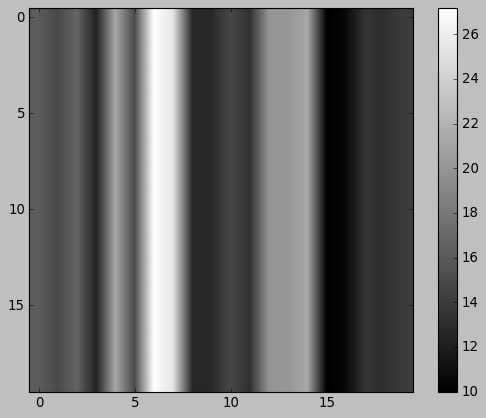

In [51]:
plt.imshow(Z, cmap='gray');
plt.colorbar()

Para mostrar dos tipos.

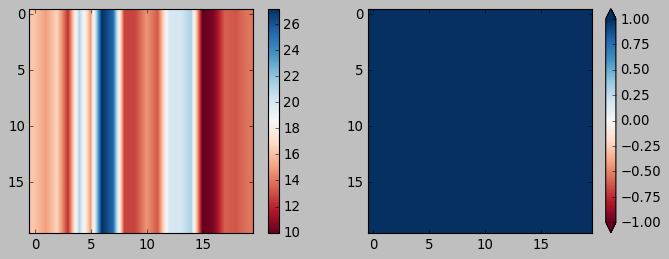

In [52]:
plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(Z, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(Z, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

## **Multiple Subplots**

In [53]:
plt.style.use('seaborn-white')

Para crear ejes utilizamos plt.axes, aunque éste también tomar cuatro argumentos que son la coordenada a la izquierda, la coordenada de altura, el ancho y el largo de los nuevos ejes.

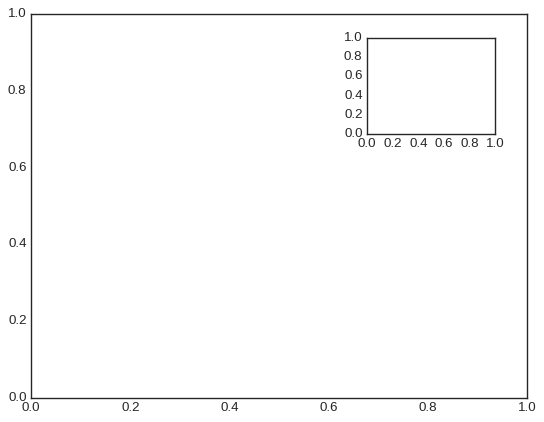

In [54]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

Y otra forma de crear gráficas en el mismo canvas con sólo un eje en común es el siguiente.

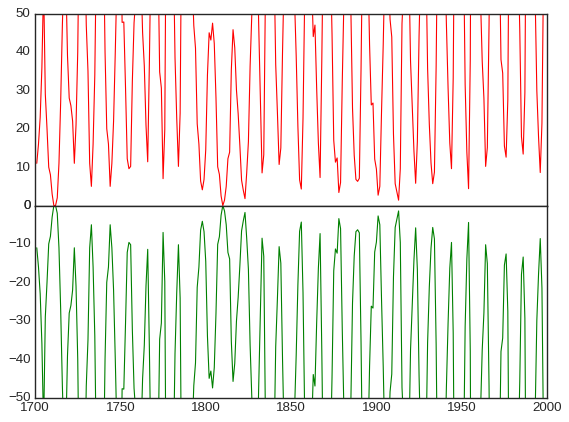

In [55]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(0, 50))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-50, 0))

ax1.plot(anios, manchas, 'r')
ax2.plot(anios, -manchas, 'g');

Lo siguiente es hacer multiaxes en un canvas. plt.subplot() sirve para generar varios axes en un sólo canvas y sus argumentos son (renglones, columnas, número de la gráfica creada en ese momento).

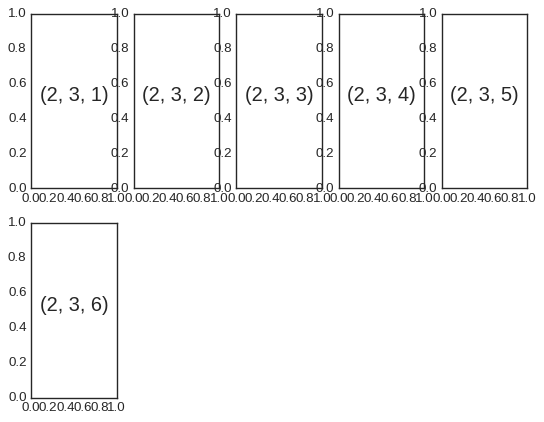

In [56]:
for i in range(1, 7):
    plt.subplot(2, 5, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

Y con subplots_adjust podemos indicar el espacio entre las gráficas.

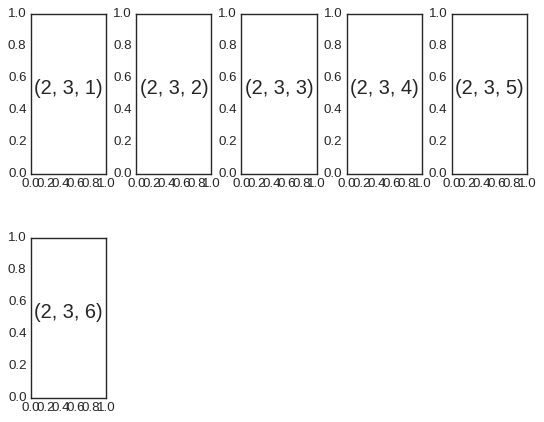

In [58]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 5, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

Y con el siguiente ejemplo puedes crear gráficas que comparten el mismo en y en cada renglón.

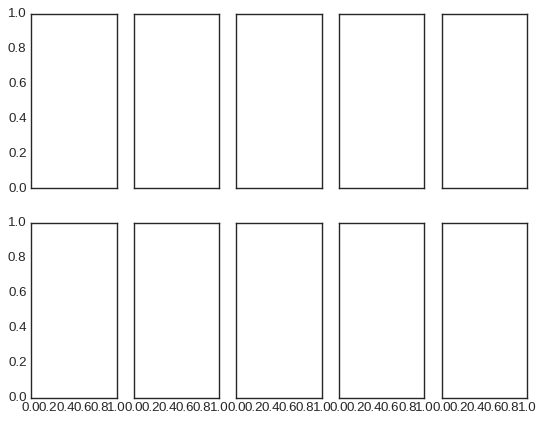

In [59]:
fig, ax = plt.subplots(2, 5, sharex='col', sharey='row')

En lo siguiente se muestra un ejemplo de cómo se grafican varias cosas a la vez. Se vuelven a usar los datos de años y manchas solares.

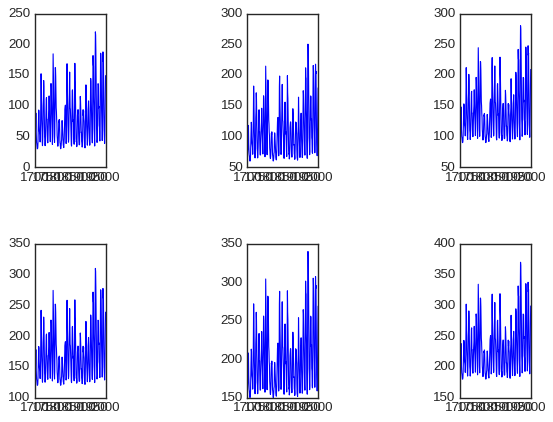

In [60]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=2)
#fig, ax = plt.subplots(2, 5, sharex='col', sharey='row')
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.plot(anios, manchas + i*30)

Finalmente, al hacer generar varias gráficas en sun solo canvas podemos crear distintos arreglos de éstas. Modificar su tamaño, poner gráficas 3d con histogramas, etc. En el siguiente ejemplo se grafica una districión de puntos de años contra manchas con la distribución de frecuencias de los años y las manchas

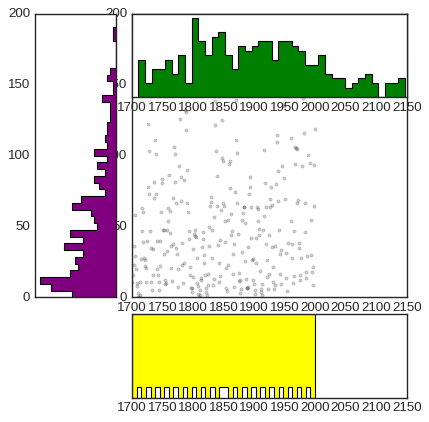

In [91]:
x = anios
y = manchas

fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
grafica = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=grafica)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=grafica)
z_hist = fig.add_subplot(grid[0, 1:], yticklabels=[], sharex=grafica)
# Distribución de puntos
grafica.plot(x, y, 'ok', markersize=3, alpha=0.2)

# Un histograma en cada eje
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='yellow')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='purple')
y_hist.invert_xaxis()

z_hist.hist(x + y,40,histtype='stepfilled', color='green'); #Solo graficamos el año más las manchas.

## **Text and Annotation**

Para esta sección utilizaremos los datos de temperaturas del 2019.

Text(0.5, 1.0, 'Temperatura media en el 2019 contra Longitud')

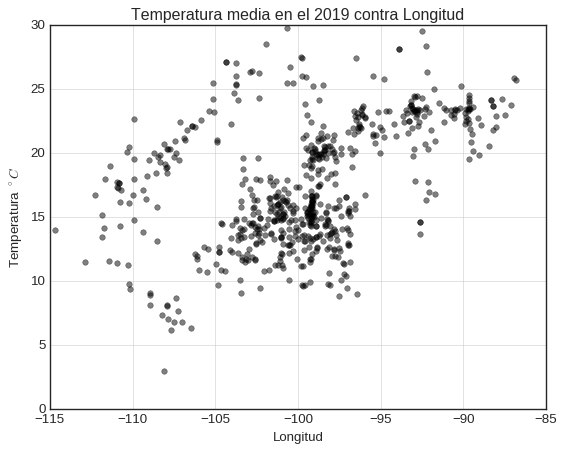

In [102]:
grafica = plt.plot(temp_media_2019['Lon'], temp_media_2019['Tmed'], 'ok', markersize = 5, alpha = 0.5)
plt.grid('True')
plt.xlabel('Longitud')
plt.ylabel('Temperatura $^\circ C$')
plt.title('Temperatura media en el 2019 contra Longitud')

Para ingresar cierta información importante en la gráfica utilizamos plt.text/ax.text. Con esto podemos añadir texto a la gráfica e indicar cifras o anotaciones.

Text(-105.39, 23.308065, 'Acaponeta Nay. SMN')

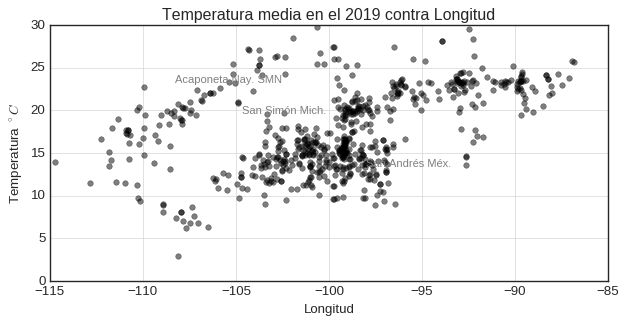

In [119]:
fig, ax = plt.subplots(figsize=(9, 4))
grafica = plt.plot(temp_media_2019['Lon'], temp_media_2019['Tmed'], 'ok', markersize = 5, alpha = 0.5)
plt.grid('True')
plt.xlabel('Longitud')
plt.ylabel('Temperatura $^\circ C$')
plt.title('Temperatura media en el 2019 contra Longitud')

style = dict(size=10, color='gray')

ax.text(-98.01, 13.435484, "San Andrés Méx.", **style)
ax.text(-102.40, 19.629032, "San Simón Mich.", ha='center', **style)
ax.text(-105.39, 23.308065, "Acaponeta Nay. SMN", ha='center', **style)

Para dibujar flechas e indicar cierta información utilizamos plt.arrow() y plt.annotate(), aunque no es recomendable utilizar plt.arrow(), ya que las flechas que se generan dependen de los datos de la gráfica y no muchas veces resulta lo que se desea.

Text(-30, 20, 'Acaponeta Nay. SMN.')

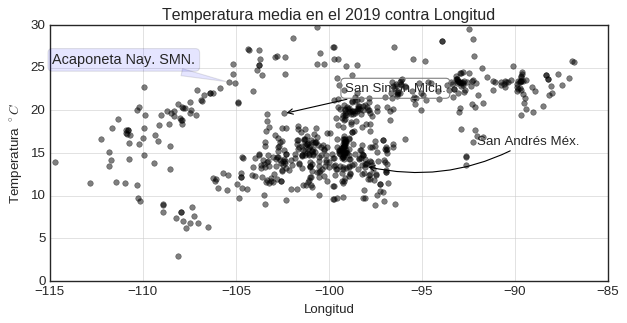

In [130]:
fig, ax = plt.subplots(figsize=(9, 4))
grafica = plt.plot(temp_media_2019['Lon'], temp_media_2019['Tmed'], 'ok', markersize = 5, alpha = 0.5)
plt.grid('True')
plt.xlabel('Longitud')
plt.ylabel('Temperatura $^\circ C$')
plt.title('Temperatura media en el 2019 contra Longitud')

style = dict(size=10, color='gray')

#ax.text(-98.01, 13.435484, "San Andrés Méx.", **style)
#ax.text(-102.40, 19.629032, "San Simón Mich.", ha='center', **style)
#ax.text(-105.39, 23.308065, "Acaponeta Nay. SMN", ha='center', **style)

ax.annotate("San Andrés Méx.", xy=(-98.01, 13.435484),  xycoords='data',
            xytext=(100, 20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))
ax.annotate("San Simón Mich.", xy=(-102.40, 19.629032),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(100, 20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
ax.annotate("Acaponeta Nay. SMN.", xy=(-105.39, 23.308065),  xycoords='data',
            xytext=(-30, 20), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

# **Customizing Ticks**

Para los siguientes ejemplos utilizaremos los datos de temperatura máxima en el 2019.

Primeramente, podemos observar nuestras gráficas con escala logarítmica. 

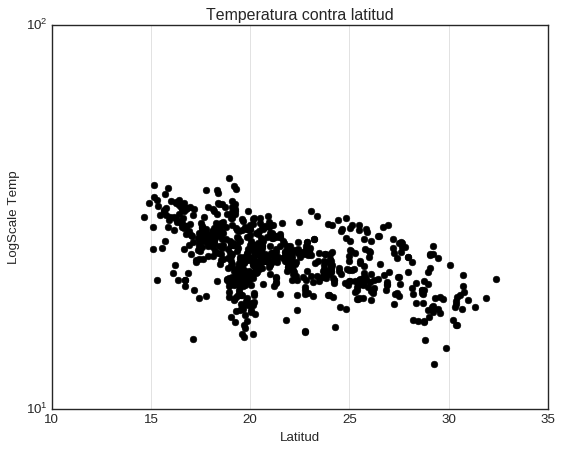

In [147]:
ax = plt.axes(yscale='log')
plt.plot(temp_maxima_2019['Lat'],temp_maxima_2019['Tmax'], 'ok')
plt.title('Temperatura contra latitud')
plt.xlabel('Latitud')
plt.ylabel('LogScale Temp')
ax.grid();

Pero los labels pueden ocultarse o esconderse:

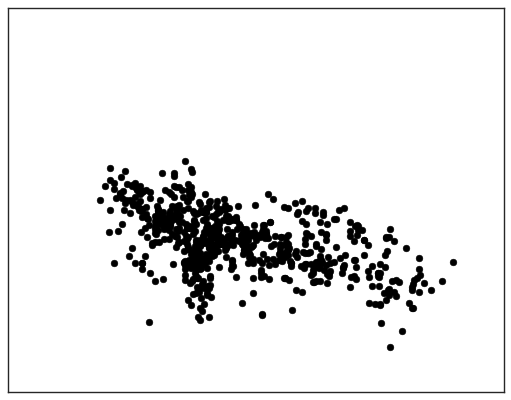

In [149]:
ax = plt.axes(yscale = 'log')
ax.plot(temp_maxima_2019['Lat'],temp_maxima_2019['Tmax'], 'ok')

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

Y para reducir el número de Ticks en múltiples gráficas hacemos lo siguiente, donde sólo mostramos 3 valores en el label 'y' y 3 valores en el label 'x'.

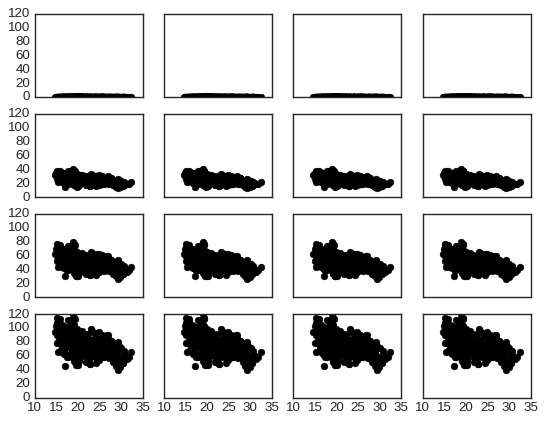

In [176]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
    
for i in range(4):
    for j in range(4):
        ax[i,j].plot(temp_maxima_2019['Lat'], temp_maxima_2019['Tmax']*i, 'ok')

Y en la siguiente figura se observa la reducción de los valores en cada label. 

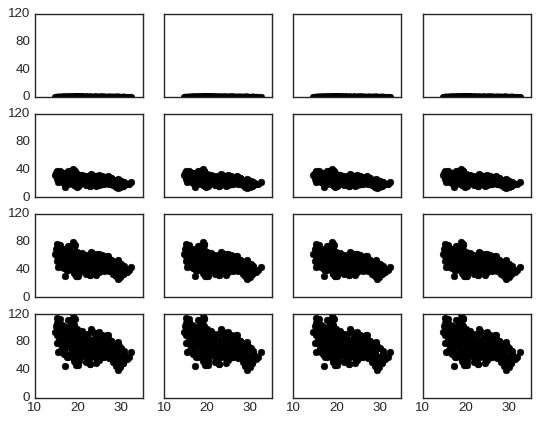

In [179]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
    
for i in range(4):
    for j in range(4):
        ax[i,j].plot(temp_maxima_2019['Lat'], temp_maxima_2019['Tmax']*i, 'ok')
    
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

Finalmente, podemos considerar hacer "fancy ticking" en nuestras gráficas. 

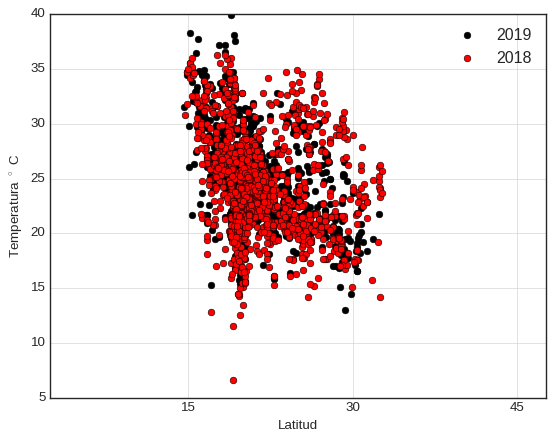

In [193]:
fig, ax = plt.subplots()
x1 = temp_maxima_2019['Lat']
x2 = temp_maxima_2018['Lat']
ax.plot(x1, temp_maxima_2019['Tmax'], 'ok', lw=3, label='2019')
ax.plot(x2, temp_maxima_2018['Tmax'],  'or', lw=3, label='2018')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlabel('Latitud')
ax.set_ylabel('Temperatura $^\circ$ C')
ax.set_xlim(0, 50)

ax.xaxis.set_major_locator(plt.MultipleLocator(15))
ax.xaxis.set_minor_locator(plt.MultipleLocator(10))

# **Customizing Matplotlib: Configurations and Stylesheets**

In [211]:
plt.style.use('classic')

En esta sección se realizarán ejemplos con los datos de temperatura mínima del 2018. 

Podemos hacer que nuestras gráficas se vean mejores con las siguientes propiedades en matplotlib. 

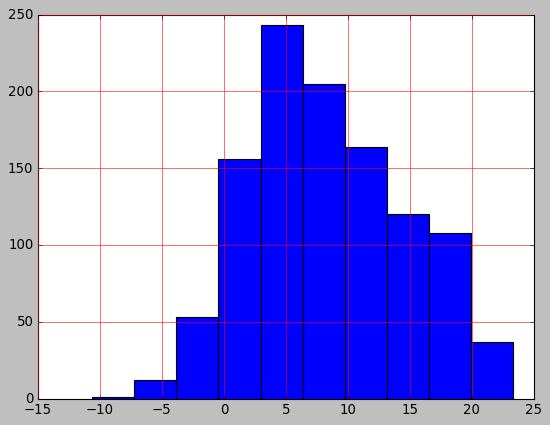

In [212]:
x = temp_minima_2018['Tmin'];
plt.hist(x);

#ax.set_axisbelow(True)

# Para dibujar una cuadrícula roja sólida.
plt.grid(color='r', linestyle='solid')

# Ocultar el valor más al extremo de cada label
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Iluminar ticks y labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# Configurar el color y el edgecolor
ax.hist(x, edgecolor='yellow', color='green');

Los mismos ajustes pueden hacerse con plt.rc().

(array([  1.,  12.,  53., 156., 243., 205., 164., 120., 108.,  37.]),
 array([-10.6 ,  -7.21,  -3.82,  -0.43,   2.96,   6.35,   9.74,  13.13,
         16.52,  19.91,  23.3 ]),
 <a list of 10 Patch objects>)

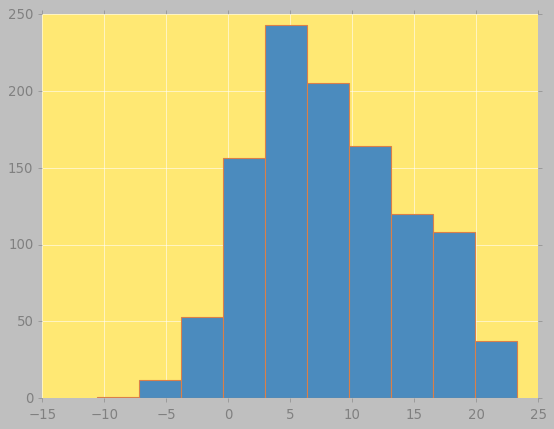

In [221]:
from matplotlib import cycler

colors = cycler('color',
                ['#4B8BBE', '#FFE873', '#646464',
                 '#419C71', '#31415C', 'da7f49'])
# Colores: cyan,  shandy, granite gray, illuminating emerald, charcoal, jasper orange

# Para el color fuera del histograma (ejes) con cuadriculado.
plt.rc('axes', facecolor='#FFE873', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
# Cuadriculado blanco
plt.rc('grid', color='w', linestyle='solid')
# Color de xtick
plt.rc('xtick', direction='out', color='gray')
# Color de ytick
plt.rc('ytick', direction='out', color='gray')
# Para las líneas del histograma
plt.rc('patch', edgecolor='da7f49')
plt.rc('lines', linewidth=2)

plt.hist(x)

Y este mismo estilo se aplica a todas las demás gráficas que se hagan.

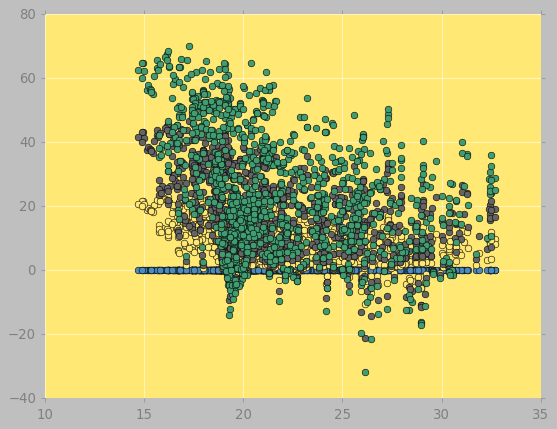

In [227]:
for i in range(4):
    plt.plot(temp_minima_2018['Lat'],temp_minima_2018['Tmin']*i, 'o')

Y si nos interesa un estilo en particular, podemos utilizar los diferentes estilos de matplotlib, los cuales pueden buscarse con el siguiente comando:

In [228]:
plt.style.available[:5]

['seaborn-poster', 'bmh', 'seaborn-notebook', '_classic_test', 'seaborn-ticks']

Y para aplicar algún estilo en particular temporalmente (sólo para una gráfica específicamente) hacemos lo siguiente:

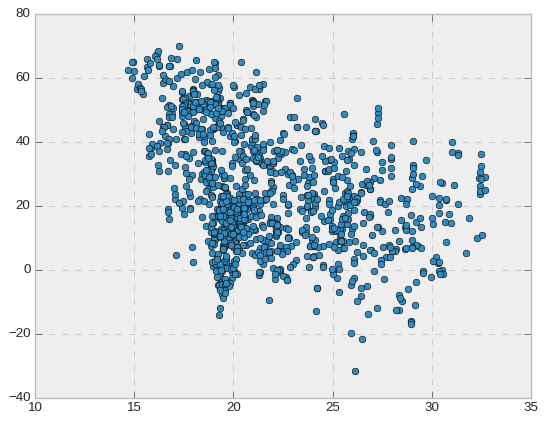

In [236]:
with plt.style.context('bmh'): #bmh es bayesian method for hackers
    plt.plot(temp_minima_2018['Lat'],temp_minima_2018['Tmin']*i, 'o')

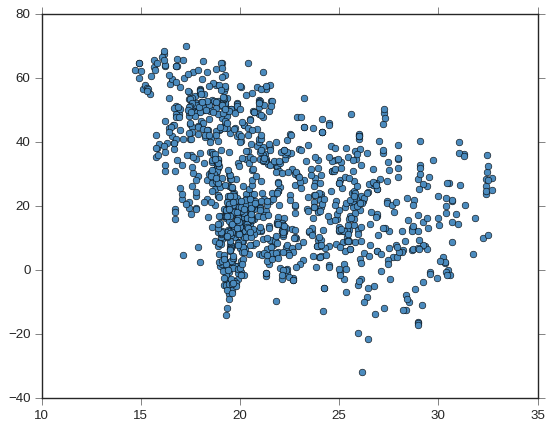

In [237]:
with plt.style.context('seaborn-ticks'):
    plt.plot(temp_minima_2018['Lat'],temp_minima_2018['Tmin']*i, 'o')

Otro estilo importante es el FivethiryEight Style, en el cual los colores son sólidos, las líneas delgadas y los ejes transparentes.

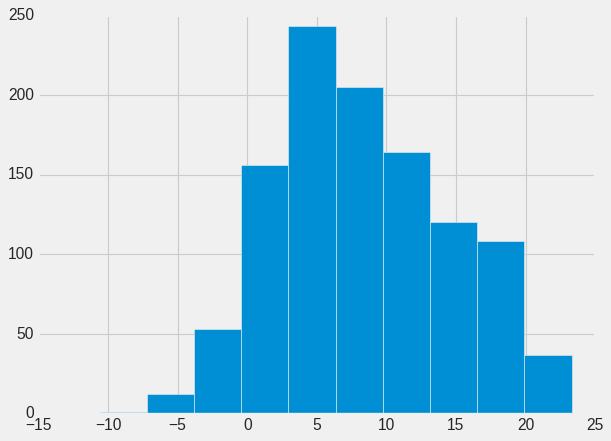

In [238]:
with plt.style.context('fivethirtyeight'):
    plt.hist(temp_minima_2018['Tmin'])

Y ggplot luce de la siguiente forma:

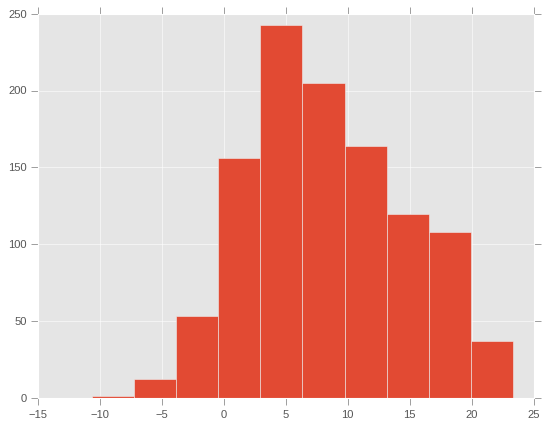

In [239]:
with plt.style.context('ggplot'):
    plt.hist(temp_minima_2018['Tmin'])

Y finalmente, el estilo dark background:

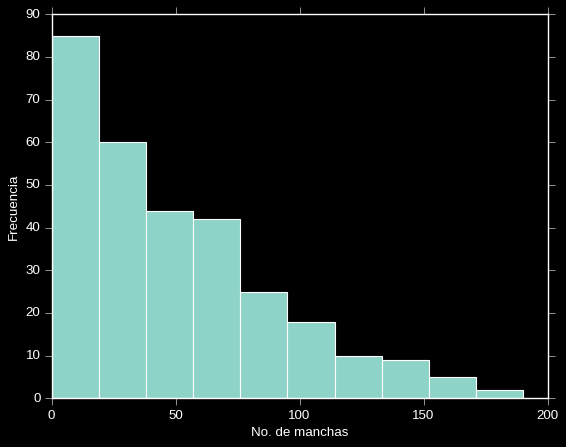

In [243]:
with plt.style.context('dark_background'):
    plt.hist(manchas)
    plt.xlabel('No. de manchas')
    plt.ylabel('Frecuencia')

# **Three-Dimensional Plotting in Matplotlib**